# Gene plots

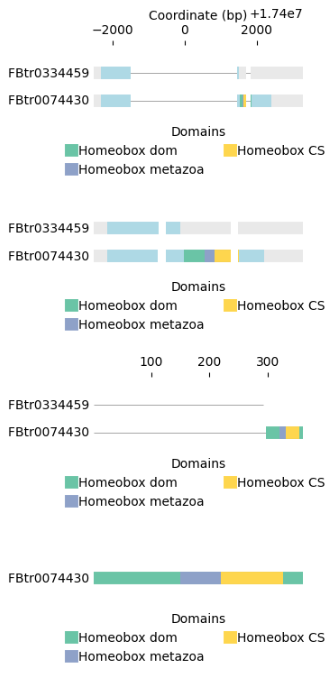

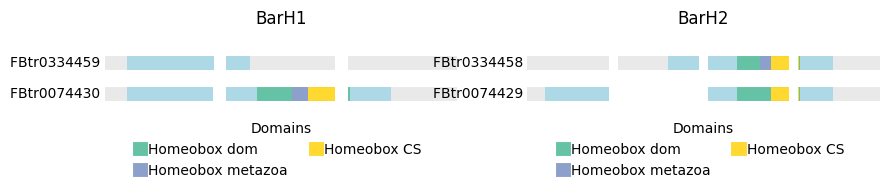

In [1]:
# ensembl_release=109
# species='homo sapiens'
# gene_id='ENSG00000141510'
# paralogs={
#     'p53':gene_id,
#     'p63':"ENSG00000073282",
#     'p73':"ENSG00000078900",
# }
# figh=5

ensembl_release = 100
species = "drosophila melanogaster"
gene_id = "FBgn0011758"  # BarH1
paralogs = {
    "BarH1": gene_id,
    "BarH2": "FBgn0004854",
}
figh = 1
protein_coding = True

In [ ]:
import matplotlib.pyplot as plt

## test

CPU times: user 3.67 s, sys: 865 ms, total: 4.54 s
Wall time: 4.51 s


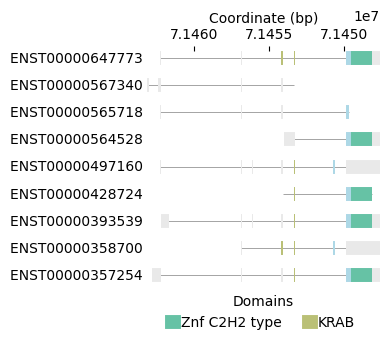

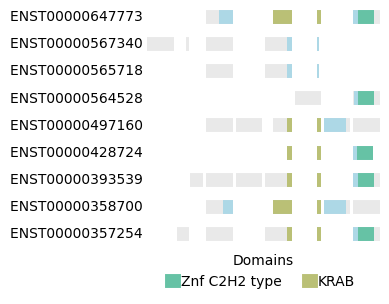

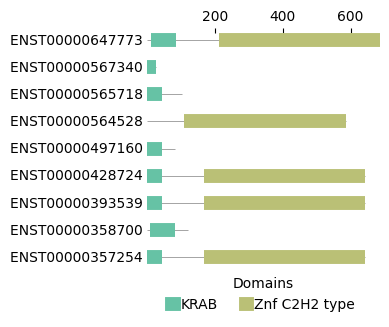

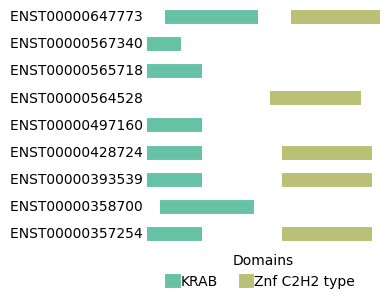

In [15]:
%%time
from chrov.domains import plot_domains as plot_forms
# from dups.viz import plot_forms

for biotype in ["t","p"]:
    for layout in [None, "blocks"]:
        fig, ax = plt.subplots(
            figsize=[3, figh],
        )
        plot_forms(
            gene_id=gene_id,
            species=species,
            ensembl_release=ensembl_release,
            biotype=biotype,
            layout=layout,
            # protein_coding=protein_coding,
            # force=True,
            return_data=True,
            data=None,
            
            ax=ax,
        )

In [ ]:
# Re-enable logging
# logging.disable(logging.NOTSET)

In [ ]:
%%time
fig, axs = plt.subplots(
    1,
    len(paralogs),
    figsize=[5 * len(paralogs), figh],
)

for i, (title, gene_id) in enumerate(paralogs.items()):
    ax = axs[i]
    plot_forms(
        gene_id=gene_id,
        species=species,
        ensembl_release=ensembl_release,
        biotype="t",
        layout="blocks",
        # protein_coding=protein_coding,
        ax=ax,
        # kws_legend=dict(
        #     title='Domains',
        #     ncol=2,
        # )
    )
    ax.set(title=title)
    # break
plt.tight_layout()